In [34]:
%load_ext autoreload
%autoreload 2

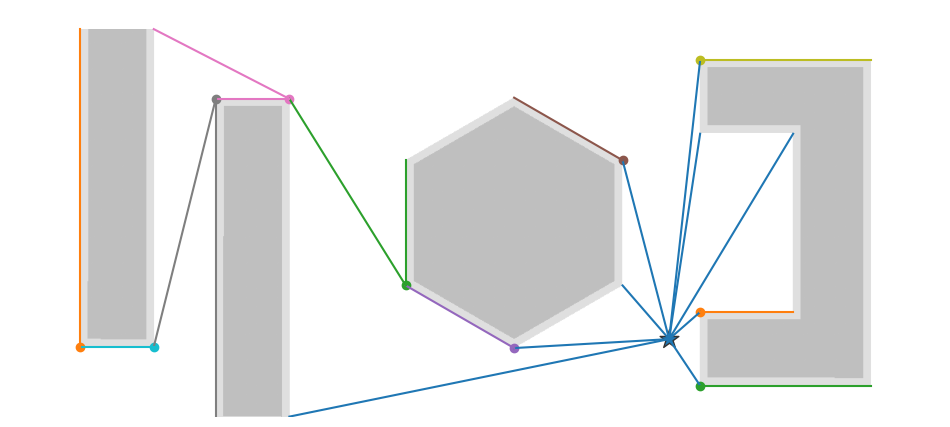

In [1]:
import matplotlib.pyplot as plt
import matplotlib
from proj3 import Map, VisTree

# create map object
rr = 10
custom_map = Map(inflate_radius=rr)

obs_corners = []
obs_corners.append(custom_map.get_corners_rect(
                                        upper_left=(100,500),w=75,h=400))
obs_corners.append(custom_map.get_corners_rect(
                                        upper_left=(275,400),w=75,h=400))
obs_corners.append(custom_map.get_corners_hex(
                                        center=(650,250),radius=150))
obs_corners.append(custom_map.get_corners_rect(
                                        upper_left=(900,450),w=200,h=75))
obs_corners.append(custom_map.get_corners_rect(
                                        upper_left=(1020,375),w=80,h=250))
obs_corners.append(custom_map.get_corners_rect(
                                        upper_left=(900,125),w=200,h=75))

# add all obstacles to map
for c in obs_corners:
    custom_map.add_obstacle(corners_tuple=c)

corners = custom_map.get_obstacle_corners_array(omit=[(3,2),
                                                        (4,1),
                                                        (4,2),
                                                        (5,1)],
                                            correction={(4,0):[0,-rr*2],
                                                        (4,3):[0,rr*2]})

goal_coord = (850,100)
goal_ori = -60

vt = VisTree(corners=corners,goal_coord=goal_coord,
            boundary=custom_map.obstacle_boundary_inflate,
            inflate_coef=1.0)

cmap = matplotlib.colormaps['tab20']
N=10
colors = [cmap(0.1*i) for i in range(N)]
icolor=0
plt.figure(figsize=(12,9))
q = [vt.root]
custom_map.plot(show=False)
rootnode=True
while len(q)>0:
    t = q.pop(0)
    if rootnode is True:
        pass
        rootnode=False
    else:
        if len(t.children)>0:
            plt.scatter(t.coord[0],t.coord[1],color=colors[icolor],marker="o")
    # print(f"children node of {t.coord} ",f"cost {t.dist_to_goal}")
    for c in t.children:
        # print("\t",c.coord)
        
        plt.plot([t.coord[0],c.coord[0]],
                 [t.coord[1],c.coord[1]],
                 color=colors[icolor],
                 linewidth=1.5)
        q.append(c)
    
    icolor = int((icolor+1)%N)

plt.scatter(goal_coord[0],goal_coord[1],s=200,color=colors[0],marker="*",
                    edgecolors=(0.2,0.2,0.2))

plt.gca().axis("off")
plt.savefig("vibility_tree.png",dpi=300)
plt.show()